# Fatal Force Analysis

This project investigates patterns of fatal encounters involving law enforcement in the United States and examines how these incidents intersect with socio-economic and demographic factors. By combining multiple datasets—including fatal police encounters, household income, education attainment, poverty levels, and racial demographics—the project aims to provide a holistic understanding of the underlying conditions associated with fatal force.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_race = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

Checking the shape of the DataFrames 


In [4]:
print("Median_Household_Income_2015:", df_hh_income.shape)
print("Pct_People_Below_Poverty_Level:", df_pct_poverty.shape)
print("Pct_Over_25_Completed_High_School:", df_pct_completed_hs.shape)
print("Share_of_Race_By_City:", df_race.shape)
print("Deaths_by_Police_US:", df_fatalities.shape)


Median_Household_Income_2015: (29322, 3)
Pct_People_Below_Poverty_Level: (29329, 3)
Pct_Over_25_Completed_High_School: (29329, 3)
Share_of_Race_By_City: (29268, 7)
Deaths_by_Police_US: (2535, 14)


### Checking if there any Nan or duplicate values

In [5]:
print("Median_Household_Income_2015:")
print("NaN values:\n", df_hh_income.isna().sum())
print("Duplicate rows:", df_hh_income.duplicated().sum())
print("-"*50)

Median_Household_Income_2015:
NaN values:
 Geographic Area     0
City                0
Median Income      51
dtype: int64
Duplicate rows: 0
--------------------------------------------------


In [6]:
print("Pct_People_Below_Poverty_Level:")
print("NaN values:\n", df_pct_poverty.isna().sum())
print("Duplicate rows:", df_pct_poverty.duplicated().sum())
print("-"*50)

Pct_People_Below_Poverty_Level:
NaN values:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Duplicate rows: 0
--------------------------------------------------


In [7]:
print("Pct_Over_25_Completed_High_School:")
print("NaN values:\n", df_pct_completed_hs.isna().sum())
print("Duplicate rows:", df_pct_completed_hs.duplicated().sum())
print("-"*50)

Pct_Over_25_Completed_High_School:
NaN values:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Duplicate rows: 0
--------------------------------------------------


In [8]:
print("Share_of_Race_By_City:")
print("NaN values:\n", df_race.isna().sum())
print("Duplicate rows:", df_race.duplicated().sum())
print("-"*50)


Share_of_Race_By_City:
NaN values:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
Duplicate rows: 0
--------------------------------------------------


In [9]:
print("Deaths_by_Police_US:")
print("NaN values:\n", df_fatalities.isna().sum())
print("Duplicate rows:", df_fatalities.duplicated().sum())
print("-"*50)

Deaths_by_Police_US:
NaN values:
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
Duplicate rows: 0
--------------------------------------------------


## Data Cleaning 

In [10]:
# Filling NaN values 0
df_hh_income = df_hh_income.fillna(0)
df_pct_poverty = df_pct_poverty.fillna(0)
df_pct_completed_hs = df_pct_completed_hs.fillna(0)
df_race = df_race.fillna(0)

# For fatalities, replacing missing categorical values with "Unknown"
df_fatalities = df_fatalities.fillna("Unknown")

df_hh_income = df_hh_income.drop_duplicates()
df_pct_poverty = df_pct_poverty.drop_duplicates()
df_pct_completed_hs = df_pct_completed_hs.drop_duplicates()
df_race = df_race.drop_duplicates()
df_fatalities = df_fatalities.drop_duplicates()


### Checking which state has the lowest and which state has highest school graduation rate.


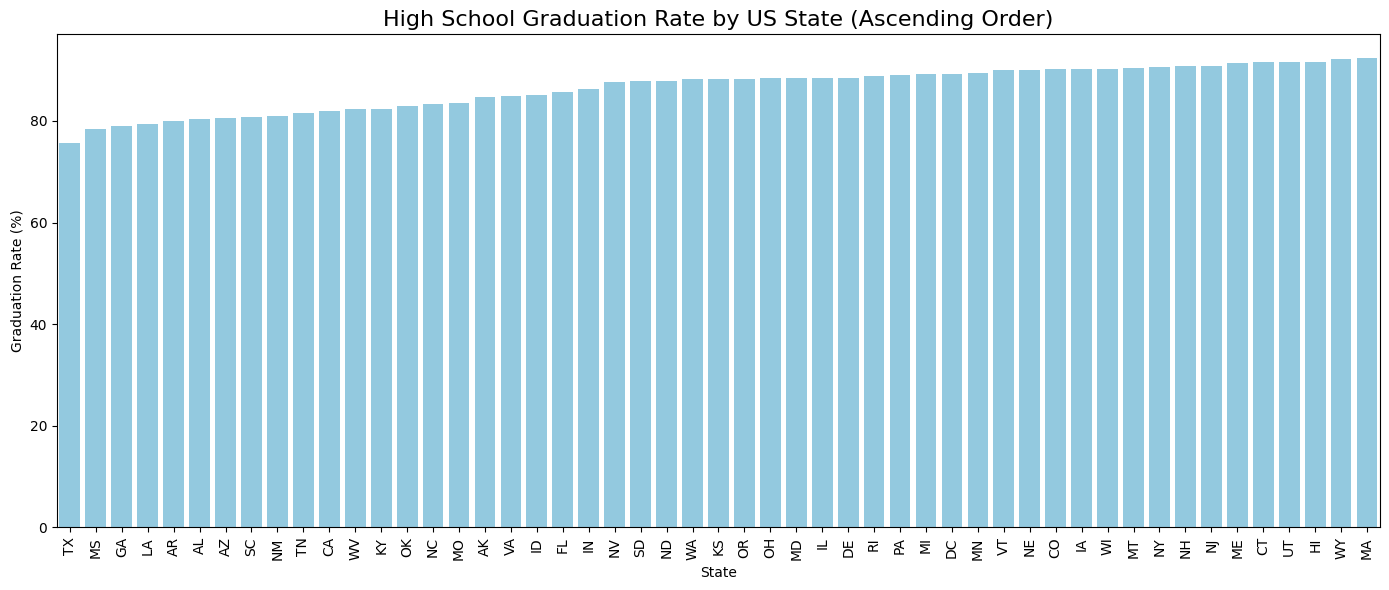

Lowest HS graduation rate: TX 75.69
Highest HS graduation rate: MA 92.40408163265306


In [11]:
# Converting values into numeric 
df_pct_completed_hs["percent_completed_hs"] = (
    df_pct_completed_hs["percent_completed_hs"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)

df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(
    df_pct_completed_hs["percent_completed_hs"], errors="coerce"
)


hs_by_state = (
    df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"]
    .mean()
    .sort_values(ascending=True)
)


plt.figure(figsize=(14, 6))
sns.barplot(
    x=hs_by_state.index,
    y=hs_by_state.values,
    color="skyblue"
)
plt.title("High School Graduation Rate by US State (Ascending Order)", fontsize=16)
plt.ylabel("Graduation Rate (%)")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Lowest HS graduation rate:", hs_by_state.idxmin(), hs_by_state.min())
print("Highest HS graduation rate:", hs_by_state.idxmax(), hs_by_state.max())


### Creating Donut Chart of People Killed by Race

(-1.0999985650756912,
 1.099997634383482,
 -1.0999919778117708,
 1.0999996179910367)

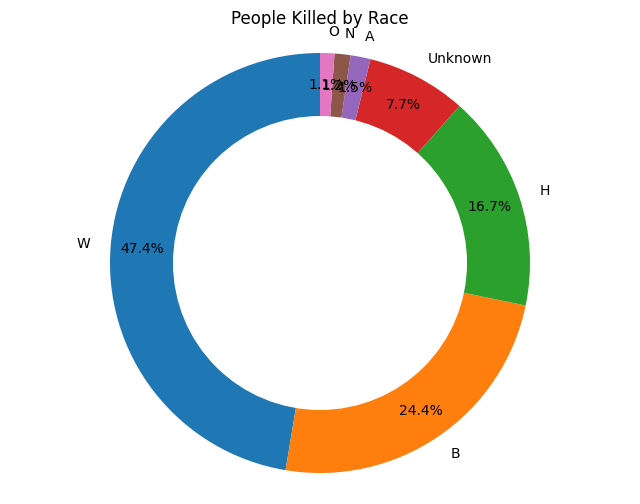

In [12]:
race_counts = df_fatalities['race'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    race_counts,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('People Killed by Race')
plt.axis('equal')  # Equal


### Creating a Chart to Compare the Total Number of Deaths of Men and Women 

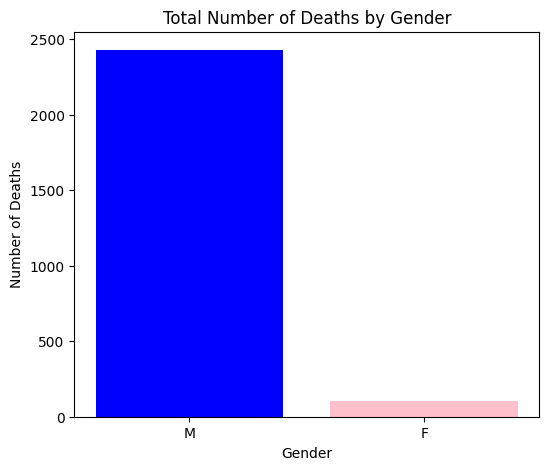

In [13]:
gender_counts = df_fatalities['gender'].value_counts()

plt.figure(figsize=(6, 5))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.show()


### Creating a chart to check how many people were killed by police were armed with guns versus unarmed 

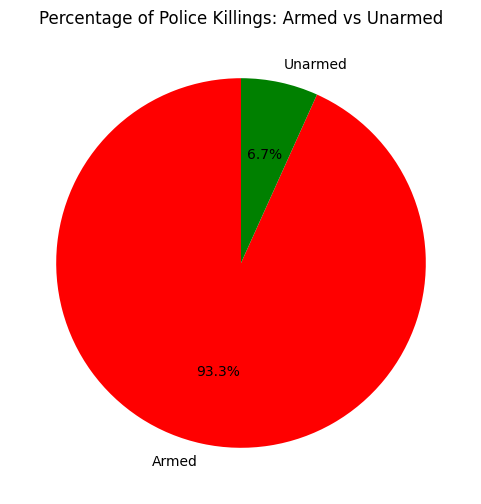

In [14]:
df_fatalities['armed_status'] = df_fatalities['armed'].apply(lambda x: 'Unarmed' if x == 'unarmed' else 'Armed')

armed_counts = df_fatalities['armed_status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(armed_counts, labels=armed_counts.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Percentage of Police Killings: Armed vs Unarmed')
plt.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [15]:
# Converting age column to numeric
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

# Filtering people under age of  25
under_25 = df_fatalities[df_fatalities['age'] < 25].shape[0]

total_people = df_fatalities['age'].notna().sum()

percent_under_25 = (under_25 / total_people) * 100

print(f"Percentage of people killed who were under 25: {percent_under_25:.2f}%")


Percentage of people killed who were under 25: 18.31%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

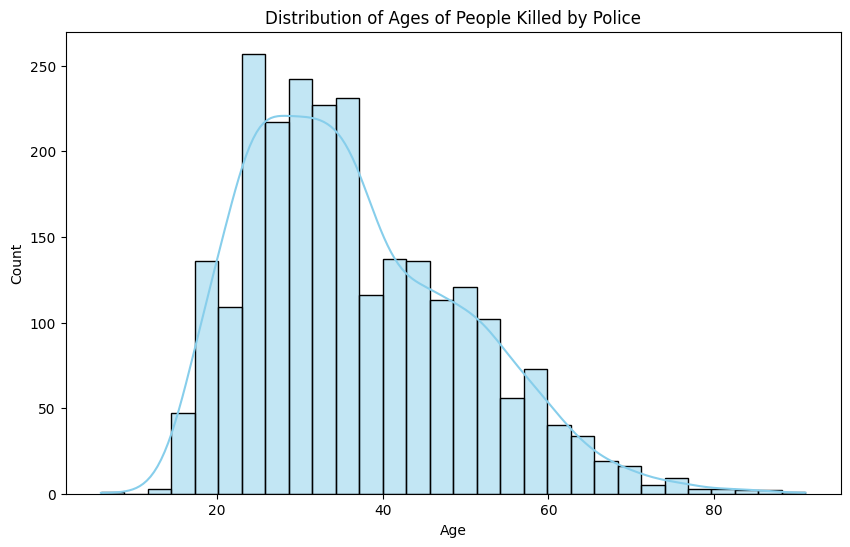

In [16]:

df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

ages = df_fatalities['age'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(ages, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

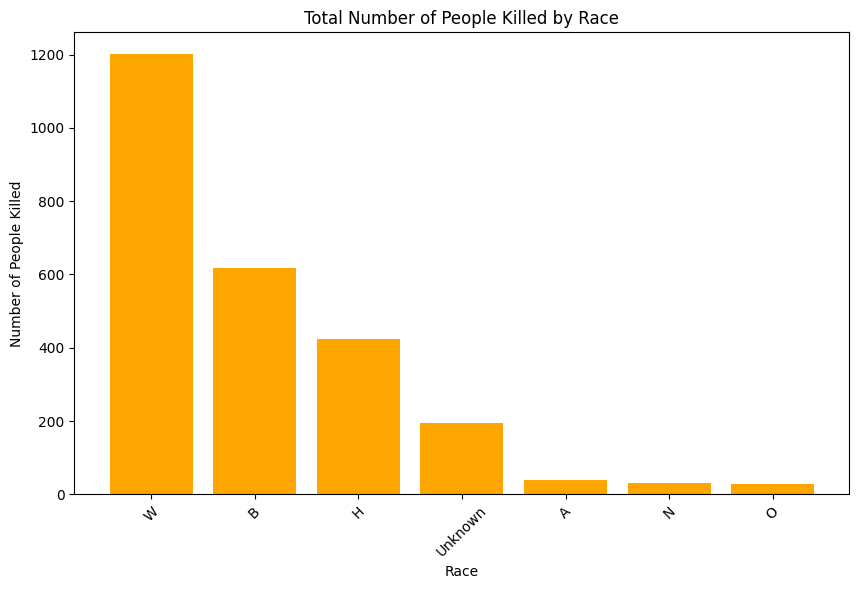

In [17]:

race_counts = df_fatalities['race'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(race_counts.index, race_counts.values, color='orange')
plt.title('Total Number of People Killed by Race')
plt.xlabel('Race')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

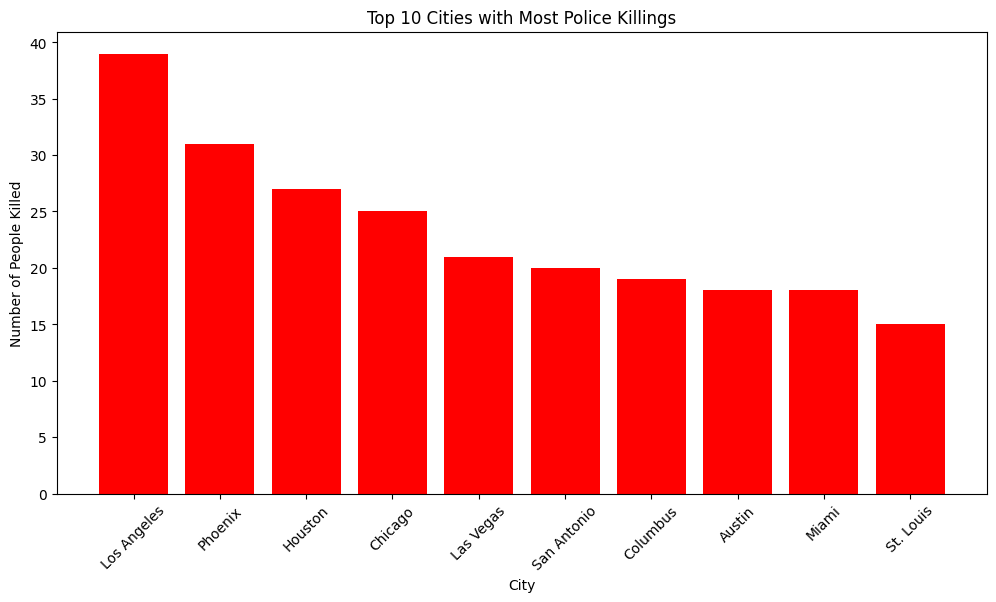

In [18]:
city_counts = df_fatalities['city'].value_counts().head(10)  # Top 10 cities

plt.figure(figsize=(12, 6))
plt.bar(city_counts.index, city_counts.values, color='red')
plt.title('Top 10 Cities with Most Police Killings')
plt.xlabel('City')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45)  # Rotate city names for readability
plt.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

C:\Users\HP\AppData\Local\Temp\ipykernel_16572\1250074747.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')


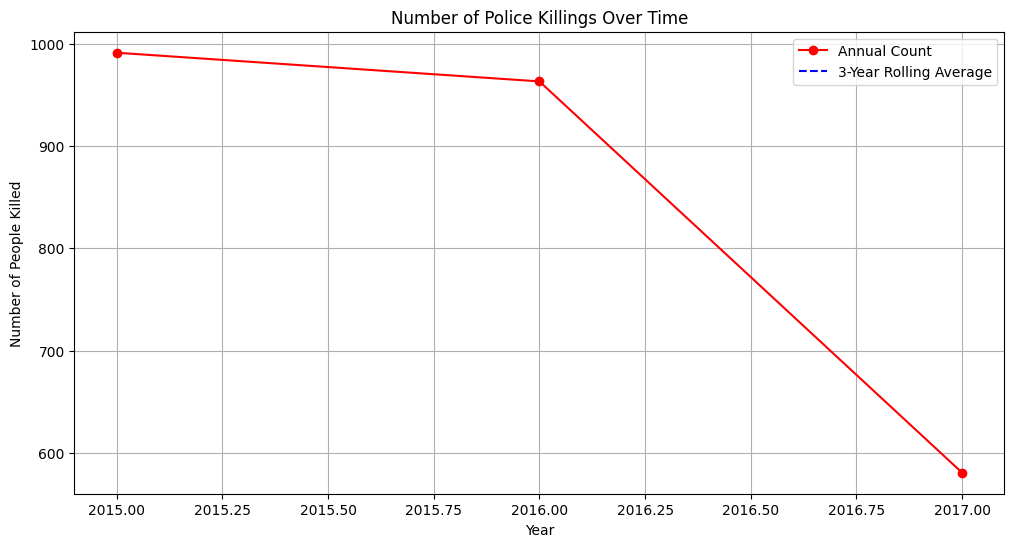

In [19]:
# Converting date column to datetime
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')

df_fatalities['year'] = df_fatalities['date'].dt.year

# Aggregating number of killings per year
yearly_counts = df_fatalities['year'].value_counts().sort_index()
 
yearly_counts_rolling = yearly_counts.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='red', label='Annual Count')
plt.plot(yearly_counts_rolling.index, yearly_counts_rolling.values, color='blue', linestyle='--', label='3-Year Rolling Average')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of People Killed')
plt.grid(True)
plt.legend()
plt.show()
